---
title: Clustering and the K-Means Algorithm
subject: Inner Products and Norms
subtitle: Grouping vectors together
short_title: Clustering and K-Means
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: Clutering, K-Means
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

## Reading

Material related to this page, as well as additional exercises, can be found in VMLS Chapter 4.

## Learning Objectives

By the end of this page, you should know:
- What is the clustering problem?
- What is the centroid, or mean, of a group of vectors?
- What is the K-means algorithm?

# The Clustering Problem

## An Informal Example of Clustering (VMLS 4.1)

Suppose we have $N$ vectors $\vv{x_1}, ..., \vv{x_N} \in V$. The goal of clustering is to group the vectors into $k$ groups, $k$ groups or *clusters* of vectors that are close to each other, as measured by the [distance](#general_distance_defn) between pairs of them.

Normally, the number of groups $k$ is much smaller than the total number of vectors $N$. Typical values in practice for $k$ range from a handful (2-3) to hundreds, and $N$ ranges from hundreds to billions.

The figure below shows a simple example with $N = 300$ vectors in $\mathbb{R}^2$, shown as small circles. The right picture shows that is easily seen: these vectors can be clustererd into $k = 3$ groups in a way that "looks right" (we will quantify this idea soon).

:::{figure}../figures/04-3_clusters.png
:label:Grouping vectors into 3 clusters
:alt: A collection of $300$ vectors in $\mathbb{R}^n$ grouped into $3$ clusters by eye
:width: 500px
:align: center
:::

This is example is a bit silly; for vectors in $\mathbb{R}^2$, clustering is easy; just make a scatter plot and use your eyes. In almost all applications, vectors live in $\mathbb{R}^n$ with $n$ much bigger than 2. Another silly aspect is how cleanly points split into clusters; real data is messy, and often many points lie between clusters. Finally, in real examples, it is not always obvious how many clusters $k$ there are.

## Applications of Clustering

Despite all of this, we'll see clustering can still be incredibly useful in practice. Before we dive into more details, let's highlight a few common applications where clustering is useful:

* **Topic discovery.** Suppose $\vv{x_i}$ are word histograms associated with $N$ documents (a word histogram $\vv x$ has entries $x_i$ which count the number of times word $i$ appears in a document). Clustering will partition the $N$ documents into $k$ groups, which can be interpreted as groups of documents with the same or similar topics, genre, or author. This is sometimes called *automatic topic discovery*.

* **Customer market segmentation.** Suppose the vector $\vv{x_i} \in \mathbb{R}^n$ gives the dollar values of $n$ items purchased by customer $i$ in the past year. A clustering algorithm groups the customers into $k$ market segments, which are groups of customers with similar purchasing patterns.

Other examples include patient, zip code, student, and survey response clustering, as well as identifying weatehr zones, daily energy use patterns, and financial sectors. See pp. 70-71 of VLMS for more details.

## A Clustering Objective (VLMS 4.2)

Our goal now is to formalize the ideas described above, and introduce a quantitative measure of "how good a clustering" is.

### Specifying cluster assignments

We specify a clutering of vectors by assigning each vector to a group. We label the groups $1, ..., k$ and assign each of the $N$ vectors $\vv{x_1}, .., \vv{x_n}$ to a group via the vector $\vv c \in \mathbb{R}^N$, with $c_i$ being the group number that $\vv{x_i}$ has been assigned to. 

For example, if $N = 5$ and $k = 3$, then

\begin{align*}
    c = \bm 3\\1\\1\\1\\2 \em 
\end{align*}
assigns $\vv{x_1}$ to group 3; $\vv{x_2}, \vv{x_3}, \vv{x_4}$ to group 1; $\vv{x_5}$ to group 2.

We will also describe clusters by the sets of indices for each group, with $G_j$ being the set of indices associated with group $j$. For our simple example, we have

\begin{align*}
    G_1 = \{ 2, 3, 4 \}, \quad G_2 = \{5\}, \quad G_3 = \{1\}
\end{align*}

In general, we have that $G_j = \{ i \mid c_i = j\}$.

### Group representatives 

Each group is assigned a *group representative* $\vv{z_1}, ..., \vv{z_k} \in V$. Note that these representatives can be any vector, and need not be one of the given vectors $\vv{x_1}, ..., \vv{x_N}$. A good clustering will have each representative close to vectors in its associated group, i.e.,

\begin{align*}
    \text{dist}(\vv{x_i}, \vv{z_{c_i}}) = \| \vv{x_i} - \vv{z_{c_i}} \|
\end{align*}
is small for all $i = 1,..., N$. Note that according to our notation, $\vv{x_i}$ is in group $c_i$, so $\vv{z_{c_i}}$ is the group representative against which $\vv{x_i}$ should be measured.

### A clustering objective

We now define a *clustering objective* that assigns a score, or cost, to a choice of clustering and representatives:

:::{prf:definition} The Clustering Objective
:label: clustering-objective-defn
We will define the clustering cost associated with choice of group representantives $\vv{x_1}, ..., \vv{x_k}$ and a choice of assignments $c_1, ..., c_N$ as

\begin{align*}
    J_{\text{clust}} := \frac{\| \vv{x_1} - \vv{z_{c_1}} \|^2 + \| \vv{x_2} - \vv{z_{c_2}} \|^2 + ... + \| \vv{x_N} - \vv{z_{c_N}} \|^2}{N}
\end{align*}

This computes the mean square distance from the vectors to their associated representatives. The smaller $J_{\text{clust}}$ is, the "better" the clustering. (What does it mean if $J_{\text{clust}} = 0$?)
:::

A clustering is said to be *optimal* if the choice of group assignments $c_1, ..., c_N$ and group representatives $\vv{z_1}, ..., \vv{z_N}$ lead to the smallest achievable clustering objective $J_{\text{clust}}$; in this case, these choices are said to *minimize the objective $J_{\text{clust}}$*. Unfortunately, except for very small problems, it is computationally prohibitive to find an optimal clustering.

Forutunately, the *k-means algorithm* we will introduce next can be run efficiently on very large problems, and often finds very good clusterings that achieve objective values $J_{\text{clust}}$ near the smallest possible value. Because k-means finds *suboptimal* solutions, we call it a *heuristic*. Heuristics are often looked down on in more theory oriented circles because they cannot guarantee the quality of their solutions, but as we will see, they often work incredibly well in practice!

# The K-Means Algorithm

The idea behind k-means is to break down the overall hard problem of choosing the best representatives and clusterings at the same time into two subproblems we can easily solve effectively. While we can't yet solve the problem of jointly choosing group assignments of group representatives to minimize $J_{\text{clust}}$, we know how to solve for one component when the other is fixed.

## Partitioning vectors with representatives fixed

Pretend for a moment that we have already found group representatives $\vv{z_1}, ..., \vv{z_k}$, and our task is to pick the group assignments $c_1, ..., c_N$ which lead to the smallest possible $J_{\text{clust}}$. This problem is actually very easy! We will use the idea of [nearest neighbors](#distance-nearest_neighbors) we saw in the previous section.

Notice that the objective [$J_{\text{clust}}$](#clustering-objective-defn) is a sum of $N$ terms, with one term for each vector $\vv{x_i}$. Further, the choice of $c_i$ (i.e., the group to which we assign $\vv{x_i}$) only affects the term 

\begin{align*}
    \frac 1 N \| \vv{x_i} - \vv{z_{c_i}} \|^2
\end{align*}

in $J_{\text{clust}}$. This means we should choose $c_i$ to make this term smallest since it doesn't affect any other terms in our clustering objective. To minimize $\| \vv{x_i} - \vv{z_{c_i}} \|$, we pick the $c_i$ so that

\begin{align*}
    \| \vv{x_i} - \vv{z_{c_i}} \| \leq \| \vv{x_i} - \vv{z_{c_j}} \| \quad \text{for $j = 1, ..., k$.}
\end{align*}

This should look familiar! Modulo our new notation, we should asign $\vv{x_i}$ to its [nearest neighbor](#distance-nearest_neighbors) among the representatives.

## Optimizing the group representatives with assignments fixed

Now we flip things around, and assume each vector $\vv{x_i}$ has been assigned to a group $c_i$. How should we pick group representatives $\vv{z_1}, ..., \vv{z_k}$ to minimize $J_{\text{clust}}$? We start be rearranging our objectives into $k$ sums, one for each group:

\begin{align*}
    J_{\text{clust}} = J_1 + J_2 + ... + J_k
\end{align*}

where $J_j := \frac 1 N \sum_{i \in G_j}{\| \vv{x_i} - \vv{z_j} \|^2}$ is the contribution to $J_{\text{clust}}$ from the vectors in group $j$. The sum notation here means we should include terms $\| \vv{x_i} - \vv{z_j} \|^2$ in our sum if $i \in G_j$ (i.e., if $\vv{x_i}$ has been assigned to group $j$).

The choice of representative $\vv{z_j}$ only affects the term $J_j$, so we can choose $\vv{z_j}$ to minimize $J_j$. You can check, e.g., using vector calculus, that the best choice is to pick $\vv{z_j}$ to be the *average (or centroid)* of the vectors in group $j$:

\begin{align*}
    \vv{z_j} = \frac{1}{|G_j|} \sum_{i \in G_j}{\vv{x_i}}
\end{align*}

Here $|G_j|$ is the *cardinality of the set $G_j$*, and denotes the number of elements in the set $G_j$, i.e., the size of group $j$.

## Pseudocode for the k-means algorithm

While we can't yet solve the problem of jointly choosing group assignments & group representatives $J_{\text{clust}}$, we know how to solve for one component when the other is fixed. 

The k-means algorithm produces an approximate solution to the clustering problem by *iterating* between the two subroutines. A key feature of this approach is that $J_{\text{clust}}$ gets better or stays the same with each iteration, meaning it is guaranteed to converge, to a (likely suboptimal) solution.

We next state the pseudocode for the k-means algorithm.

:::{prf:algorithm} The K-Means Algorithm
:label: k-means-alg

**Inputs** A list of $N$ vectors $\vv{x_1}, ..., \vv{x_N}$, and an initial list of $k$ group representative vectors $\vv{z_1}, ..., \vv{z_k}$

**Output** An approximate solution to the clustering problem

* Repeat until convergence:
  * *Parition the vectors into $k$ groups.* For each vector $i = 1, ..., N$, assign $\vv{x_i}$ to the group associated with the nearest representative.
  * *Update representatives*. For each group $j = 1, ..., k$, set $\vv{z_j}$ to be the mean of the vectors in group $j$.
:::

One iteration of the k-means algorithm is illustrated below:

:::{figure}../figures/04-kmeans.png
:label:Grouping vectors into 3 clusters
:alt: A collection of $300$ vectors in $\mathbb{R}^n$ grouped into $3$ clusters by eye
:width: 500px
:align: center
:::

Left: vectors $\vv{x_1}, ..., \vv{x_N}$ are assigned to the nearest representative $\vv{z_j}$.

Right: the representatives are updated to the centroids of the new groups.

:::{warning} Some comments and clarifications
* Ties can be broken by assigning $\vv{x_i}$ to the tied group of smallest $j$ (or any other *deterministic* rule – assigning at random can affect convergece of the algorithm).

* If at any time a group is empty, it (and its representative) are simply dropped for the rest of the execution.

* If group assignments don't change during an iteration, then the representatives will also stay the same: this is what we mean by the algorithm *converging*.

* there are many ways to initialize the group representatives: a common approach is to pick them at random from the $\vv{x_i}$.
:::


:::{warning} Warning: K-means is a heuristic!
* There is no guarantee that the solutions that k-means produces are globally optimal!

* For the implementation of k-means given above, there is also no guarantee that it will converge to a solution quickly; it might take a long time (even exponentially long in the number of clusters) to converge for some inputs.
:::

# Example: K-Means using Python and scikit-learn 

The ```scikit-learn``` library in Python gives an implementation of the k-means algorithm. Documentation is available [here](#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans).

In the following code, we generate a sample clustering problem with $N = 600$ and $k = 3$. We then run k-means, plot some intermediate clusterings, and plot the final clustering. We also plot the rate of convergence (k-means loss vs. number of iterations).

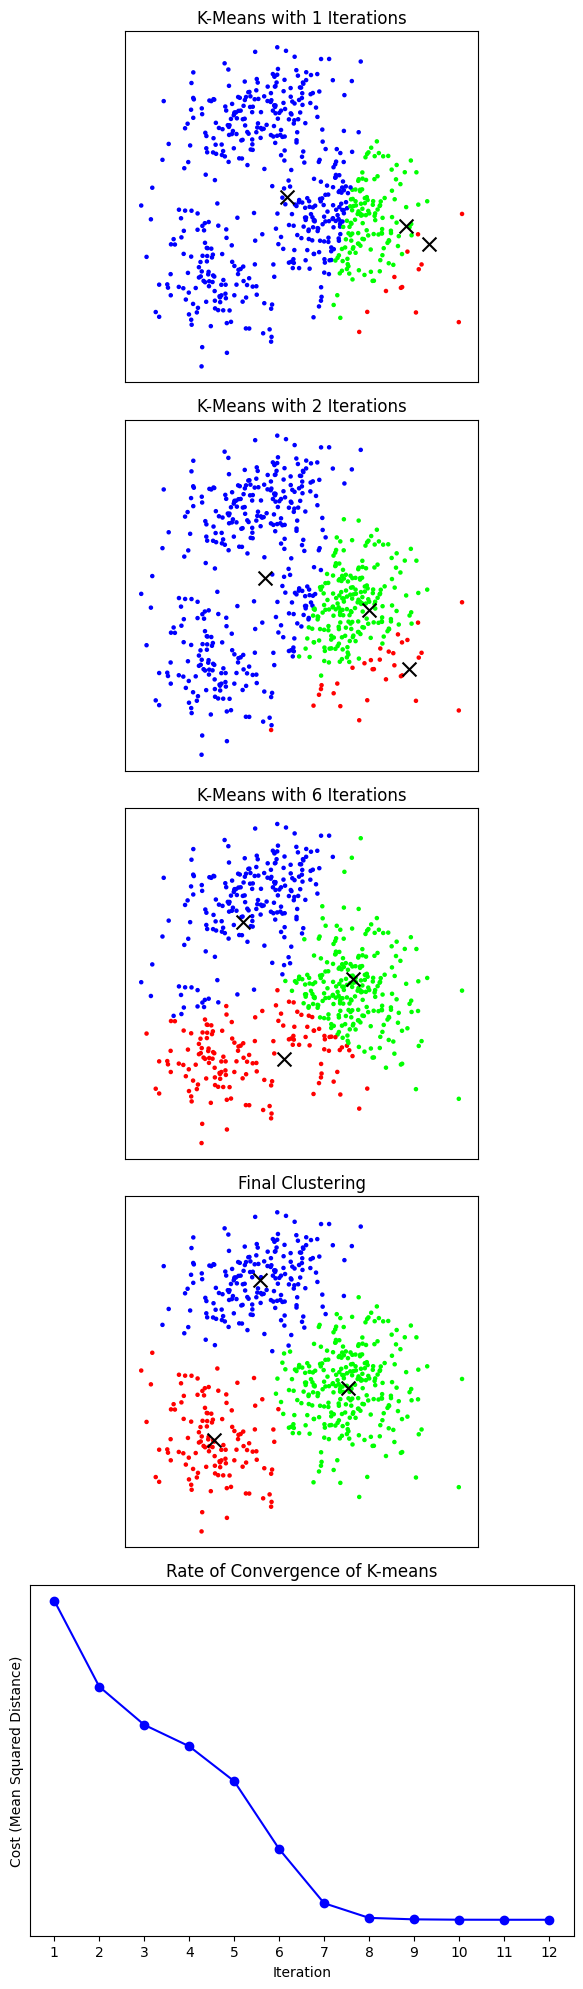

In [145]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(2030)

# Sample data
sample1 = np.random.multivariate_normal(
    mean=np.array([2, 0]),
    cov=np.array([[2, 0], [0, 2]]),
    size=300
)

sample2 = np.random.multivariate_normal(
    mean=np.array([-1, 4]),
    cov=np.array([[2, 0.5], [0.5, 1]]),
    size=180
)

sample3 = np.random.multivariate_normal(
    mean=np.array([-3, -2]),
    cov=np.array([[1, -0.2], [-0.2, 2]]),
    size=120
)

# Generates a dataset with data sampled from 3 normal distributions.
data = np.concatenate((sample1, sample2, sample3), axis=0)
initial_representatives = [[5, 0], [4.5, 0], [4, 0]]

# Define RGB colors for the clusters.
colors = np.array([
    [1, 0, 0], 
    [0, 1, 0], 
    [0, 0, 1]  
])

fig, axes = plt.subplots(5, 1, figsize=(20, 20))

# For demonstration purposes, we will purposely limit the number of k-means iterations
# and show you the outputs along the way!
num_iterations = [1, 2, 6]
for i in range(len(num_iterations)):
    kmeans = KMeans(n_clusters=3, random_state=0, init=initial_representatives, max_iter=num_iterations[i]).fit(data)

    ax = axes[i]
    ax.scatter(data[:, 0], data[:, 1], c=colors[kmeans.labels_], s=5)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', s=100)
    ax.set_title(f'K-Means with {num_iterations[i]} Iterations')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

# Now, we allow the algorithm to run until convergence and plot the clusters.
kmeans = KMeans(n_clusters=3, random_state=0, init=initial_representatives).fit(data)

ax = axes[3]
ax.scatter(data[:, 0], data[:, 1], c=colors[kmeans.labels_], s=5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', s=100)
ax.set_title(f'Final Clustering')
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# We also run the code again for a bunch of different iteration numbers, and plot the 
# rate of convergence to the solution.
costs = []
for i in range(kmeans.n_iter_):
    kmeans = KMeans(n_clusters=3, random_state=0, init=initial_representatives, max_iter=i+1).fit(data)
    costs.append(kmeans.inertia_ / data.shape[0])

ax = axes[4]
ax.plot(range(1, kmeans.n_iter_ + 1), costs, marker='o', linestyle='-', color='b')
ax.set_title('Rate of Convergence of K-means')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost (Mean Squared Distance)')
ax.set_aspect('equal')
ax.set_xticks(range(1, kmeans.n_iter_ + 1))
ax.set_yticks([])

plt.tight_layout()
plt.show()

# Example: Automated Topic Discovery

TODO